Data source: [National Center for Environmental Information](https://www.ncei.noaa.gov/access/past-weather/san%20francisco)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,date,average,max,min,prcp,snow,snwd
0,1921-01-01,NaN,60.0,45.0,0.00,0.0,NaN
1,1921-01-02,NaN,54.0,46.0,0.00,0.0,NaN
2,1921-01-03,NaN,60.0,50.0,0.00,0.0,NaN
3,1921-01-04,NaN,61.0,47.0,0.00,0.0,NaN
4,1921-01-05,NaN,54.0,47.0,0.38,0.0,NaN


In [4]:
df = df.drop(columns=['average', 'prcp', 'snow', 'snwd'])

2022 updated data from [National Weather Service](https://www.weather.gov/wrh/climate?wfo=mtr)

In [5]:
new_data_2022 = {'date':['2022-09-01', '2022-09-02','2022-09-03', '2022-09-04', '2022-09-05','2022-09-06','2022-09-07','2022-09-08','2022-09-09','2022-09-10','2022-09-11'],
        'max':[66,68,75,82,91,98,81,87,71,68,69],
        'min':[54,54,57,57,61,64,62,62,57,59,61]
       }
df2022 = pd.DataFrame(new_data_2022)

2020 and 2021 data from [NOAA Station Data](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00023272/detail)

In [6]:
new_data_2021 = {'date':['2021-09-01', '2021-09-02','2021-09-03', '2021-09-04', '2021-09-05','2021-09-06','2021-09-07','2021-09-08','2021-09-09','2021-09-10','2021-09-11'],
        'max':[64,66,61,66,68,77,66,70,64,63,66],
        'min':[56,56,54,53,52,54,57,59,57,57,57]
       }
df2021 = pd.DataFrame(new_data_2021)

In [7]:
new_data_2020 = {'date':['2020-09-01', '2020-09-02','2020-09-03', '2020-09-04', '2020-09-05','2020-09-06','2020-09-07','2020-09-08','2020-09-09','2020-09-10','2020-09-11'],
        'max':[65,66,64,69,89,100,91,71,60,64,71],
        'min':[56,58,56,55,58,71,62,57,57,57,54]
       }
df2020 = pd.DataFrame(new_data_2020)

In [9]:
df_update = pd.concat([df,df2020,df2021,df2022],ignore_index=True)
df_update['gap'] = df_update['max'] - df_update['min']

In [10]:
df_update['date'] = pd.to_datetime(df_update.date, format='%Y-%m-%d', errors='coerce')

In [11]:
df_update.set_index('date', inplace=True)

In [12]:
df_update.head()

,max,min,gap
date,,,
1921-01-01,60.0,45.0,15.0
1921-01-02,54.0,46.0,8.0
1921-01-03,60.0,50.0,10.0
1921-01-04,61.0,47.0,14.0
1921-01-05,54.0,47.0,7.0


## filter out all the 0901-0911 data

In [29]:
df_sept = df_update[df_update.index.month.isin([9])&df_update.index.day.isin([1,2,3,4,5,6,7,8,9,10,11])].sort_index(ascending=True).reset_index()

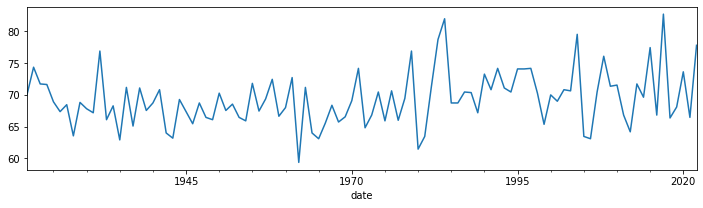

In [38]:
fig1 = df_sept.resample('Y', on='date')['max'].mean().plot(figsize=(12,3)).figure
fig1.savefig('fig1.pdf')

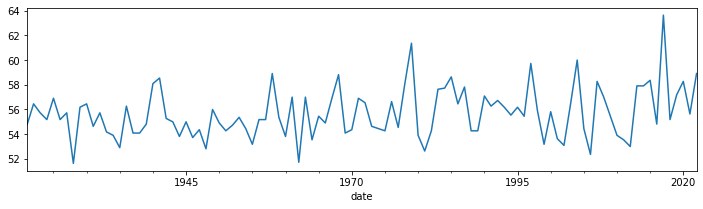

In [40]:
fig2 = df_sept.resample('Y', on='date')['min'].mean().plot(figsize=(12,3)).figure
fig2.savefig('fig2.pdf')

<AxesSubplot:xlabel='date'>

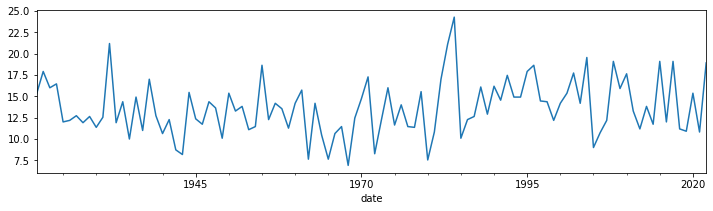

In [34]:
df_sept.resample('Y', on='date')['gap'].mean().plot(figsize=(12,3))

<AxesSubplot:xlabel='date'>

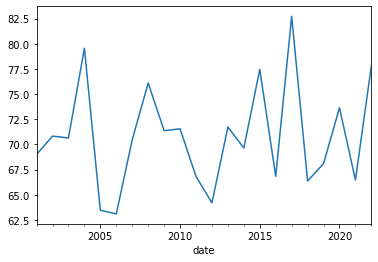

In [17]:
df_sept[df_sept.date.dt.year > 2000].resample('Y', on='date')['max'].mean().plot()

<AxesSubplot:xlabel='date'>

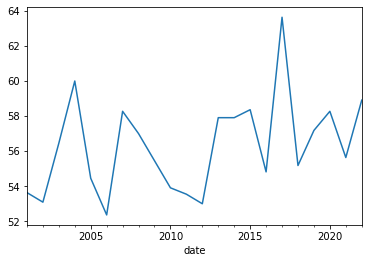

In [18]:
df_sept[df_sept.date.dt.year > 2000].resample('Y', on='date')['min'].mean().plot()

<AxesSubplot:xlabel='date'>

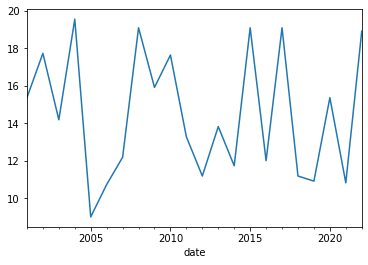

In [19]:
df_sept[df_sept.date.dt.year > 2000].resample('Y', on='date')['gap'].mean().plot()

## Group by year

In [20]:
df_sept.set_index('date', inplace=True)

In [22]:
rank = df_sept.groupby(by=[df_sept.index.year]).mean().reset_index()

In [23]:
rank.sort_values(by='max',ascending=False).head(10)

,date,max,min,gap
96,2017,82.727273,63.636364,19.090909
63,1984,82.000000,57.727273,24.272727
83,2004,79.545455,60.000000,19.545455
62,1983,78.727273,57.636364,21.090909
101,2022,77.818182,58.909091,18.909091
94,2015,77.454545,58.363636,19.090909
58,1979,76.909091,61.363636,15.545455
11,1932,76.909091,55.727273,21.181818
87,2008,76.090909,57.000000,19.090909
1,1922,74.363636,56.454545,17.909091


In [24]:
rank.sort_values(by='min',ascending=False).head(10)

,date,max,min,gap
96,2017,82.727273,63.636364,19.090909
58,1979,76.909091,61.363636,15.545455
83,2004,79.545455,60.000000,19.545455
76,1997,74.181818,59.727273,14.454545
101,2022,77.818182,58.909091,18.909091
37,1958,72.454545,58.909091,13.545455
47,1968,65.727273,58.818182,6.909091
64,1985,68.727273,58.636364,10.090909
20,1941,70.818182,58.545455,12.272727
94,2015,77.454545,58.363636,19.090909


In [25]:
rank.sort_values(by='gap',ascending=False).head(10)

,date,max,min,gap
63,1984,82.000000,57.727273,24.272727
11,1932,76.909091,55.727273,21.181818
62,1983,78.727273,57.636364,21.090909
83,2004,79.545455,60.000000,19.545455
96,2017,82.727273,63.636364,19.090909
94,2015,77.454545,58.363636,19.090909
87,2008,76.090909,57.000000,19.090909
101,2022,77.818182,58.909091,18.909091
34,1955,71.818182,53.181818,18.636364
75,1996,74.090909,55.454545,18.636364


## Look at the day

In [26]:
df_sept.sort_values(by='max',ascending=False).head(10)

,max,min,gap
date,,,
2017-09-01,106.0,69.0,37.0
2017-09-02,102.0,75.0,27.0
2020-09-06,100.0,71.0,29.0
1984-09-08,100.0,64.0,36.0
1932-09-09,100.0,60.0,40.0
1979-09-11,98.0,67.0,31.0
2022-09-06,98.0,64.0,34.0
2004-09-05,96.0,62.0,34.0
2015-09-08,95.0,65.0,30.0


## Mission specific

The mission data is from [weather underground](https://www.wunderground.com/dashboard/pws/KCASANFR1141/table/2017-09-17/2017-09-17/monthly)

In [110]:
df = pd.read_csv("mission-temp.csv")
df = df[['date', 'high', 'avg','low']]

In [111]:
df.head()

,date,high,avg,low
0,9/1/2022,80.4 °F,65.8 °F,52.0 °F
1,9/2/2022,85.8 °F,64.6 °F,48.4 °F
2,9/3/2022,88.9 °F,70.5 °F,52.3 °F
3,9/4/2022,91.4 °F,76.6 °F,56.1 °F
4,9/5/2022,98.1 °F,70.4 °F,62.8 °F


In [112]:
df.high = df.high.str.replace('°F','').astype(float)
df.avg = df.avg.str.replace('°F','').astype(float)
df.low = df.low.str.replace('°F','').astype(float)
df['date'] = pd.to_datetime(df.date, format='%m/%d/%Y', errors='coerce')

In [88]:
df.head()

,date,high,avg,low
0,2022-09-01,80.4,65.8,52.0
1,2022-09-02,85.8,64.6,48.4
2,2022-09-03,88.9,70.5,52.3
3,2022-09-04,91.4,76.6,56.1
4,2022-09-05,98.1,70.4,62.8


In [97]:
df_avg = df[['date','avg']]
df_avg['year'] = df_avg.date.dt.year
df_avg['day'] = df_avg.date.dt.day
mission_avg = pd.pivot(df_avg, index='day', columns='year', values='avg').reset_index()
mission_avg.to_csv('clean_mission_avg.csv',index=False)

In [114]:
df_max = df[['date','high']]
df_max['year'] = df_max.date.dt.year
df_max['day'] = df_max.date.dt.day
mission_max = pd.pivot(df_max, index='day', columns='year', values='high').reset_index()
mission_max.to_csv('clean_mission_max.csv',index=False)

/var/folders/9m/w7ffkstj051dnyjnyklwvwmr0000gn/T/ipykernel_63517/669821569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_max['year'] = df_max.date.dt.year


In [91]:
df.to_csv('clean_mission_data.csv',index=False)